In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')

df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Kabiny:",df['Cabin'].isnull().mean())
print("Wiek:",df['Age'].isnull().mean() )
print("Bilet:",df['Fare'].isnull().mean())



Kabiny: 0.7710437710437711
Wiek: 0.19865319865319866
Bilet: 0.10998877665544332


Sprawdzam kolumny którę są lekko sussy

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

def levels(data):
    data['level'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
    data = data.drop(columns=['Cabin'])
    return data

def family_size(data):
    data['family size'] = data['SibSp'] + data['Parch']#łączymy dane z kolumn opisujacych ilość rodziny w jedną
    data = data.drop(columns=['SibSp', 'Parch'])
    return data

def age_of_pasngr_vs_pred_age(data):# funkcja dodaje nową kolumnę które sprawdza czy pasażer  żyl krócej bądź dłużej od średniej w danym okresie czyli rok 1912
    data['age_of_pasngr_vs_pred_age'] = data['Age'].apply(lambda x: 1 if x>52 else 0)
    return data

df = df.drop(columns=['Name', 'Fare', 'Embarked', 'Ticket','PassengerId'])#kolumny które są bezużyteczne
df = levels(df)
df = family_size(df)
df= age_of_pasngr_vs_pred_age(df)
print(df.head())


   Survived  Pclass     Sex   Age level  family size  \
0         0       3    male  22.0     U            1   
1         1       1  female  38.0     C            1   
2         1       3  female  26.0     U            0   
3         1       1  female  35.0     C            1   
4         0       3    male  35.0     U            0   

   age_of_pasngr_vs_pred_age  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  


Ogólnie myląca może być czemu w embarked i level czasami mamy te same znaki, w embarked mamy miasta portowe, a levels to poprstu poziom na którym znajsuja się pasażerowie nie mylić tego!!


In [4]:
df['Sex']= df['Sex'].map({'male':1, 'female':0})
unique_lvl=sorted(df['level'].unique())
lvl_mapping={level: idx for idx, level in enumerate(unique_lvl)}
df['level'] = df['level'].map(lvl_mapping)
df.head()


,Survived,Pclass,Sex,Age,level,family size,age_of_pasngr_vs_pred_age
0,0,3,1,22.0,8,1,0
1,1,1,0,38.0,2,1,0
2,1,3,0,26.0,8,0,0
3,1,1,0,35.0,2,1,0
4,0,3,1,35.0,8,0,0


Zakodowanie: male, fem klasycznie binarnie,
male=1, female=0.
Natomiast levels mamy label coding i przypisuje nam dla A,0 i tak dalej aż do naszego unkonowna,8

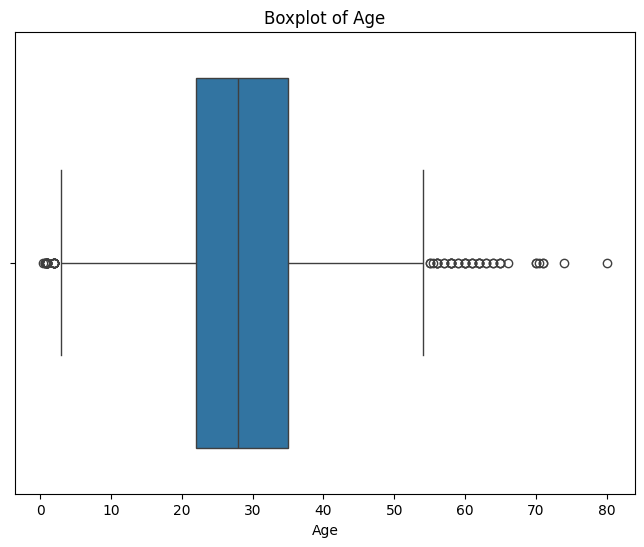

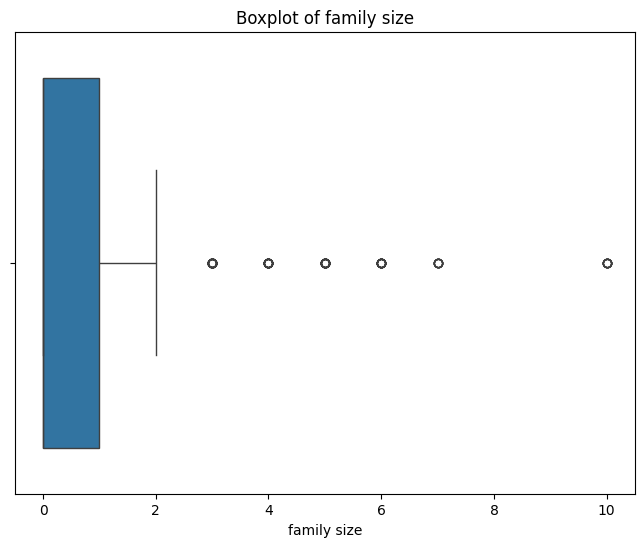

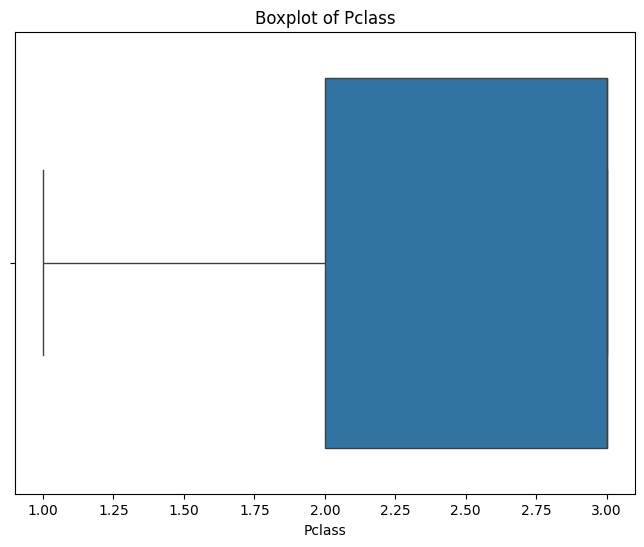

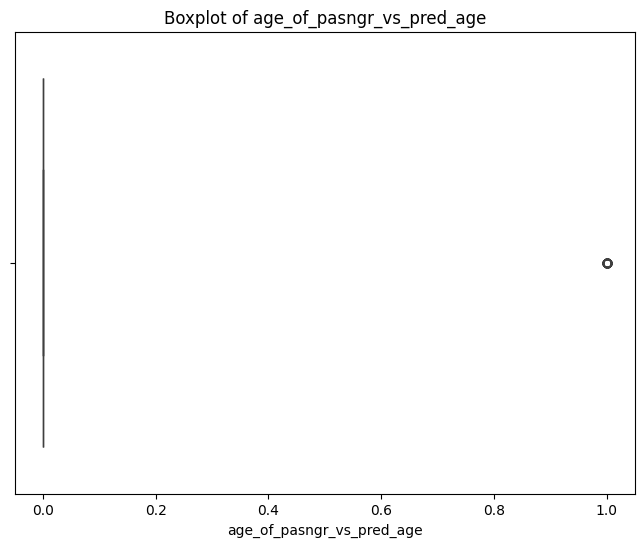

In [5]:

def boxpltos(df,columns):
   plt.figure(figsize=(8,6))
   sns.boxplot(data=df, x=columns)
   plt.xlabel(columns)
   plt.title(f'Boxplot of {columns}')

   plt.show()
   return None
boxpltos(df,"Age")
boxpltos(df,"family size")
boxpltos(df,"Pclass")
boxpltos(df,"age_of_pasngr_vs_pred_age")


Wykresy pudełkowe pokazujące rozstaw wartości , dla zmiennych numerycznych, zauważyć można już pierwsze outlinery np. w wieku,gdzie pojawiaja się wartości typu 80, lecz są to wartości jak najbardziej możliwe i nie ma potrzeby ich usuwać, lub 10 członków rodziny na pokładzie, co również jest możliwe

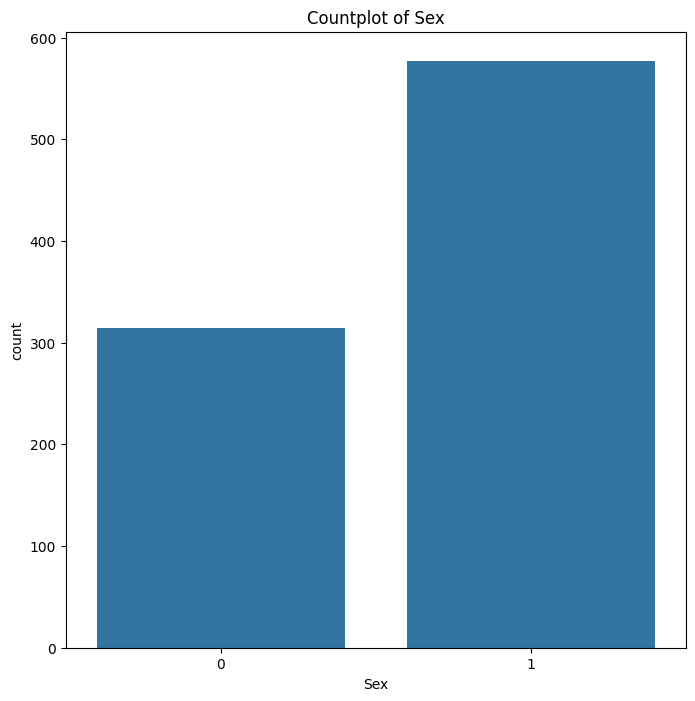

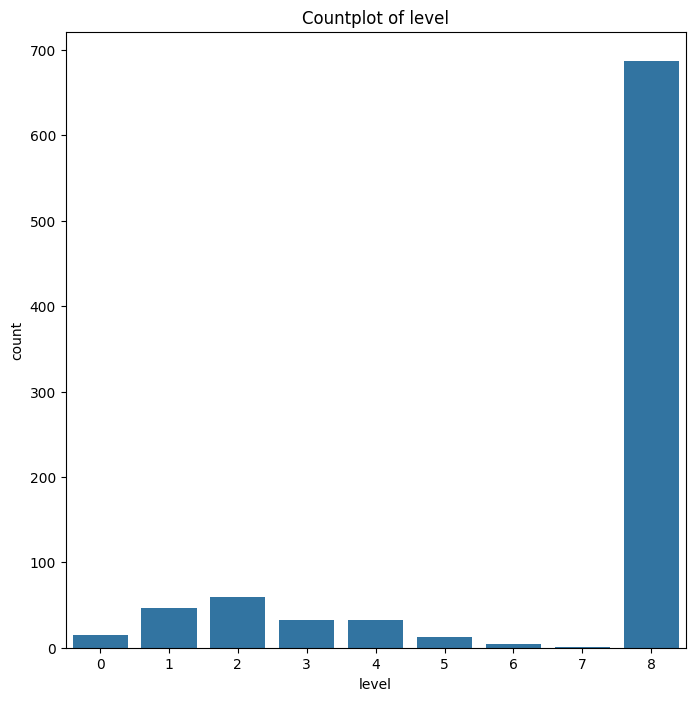

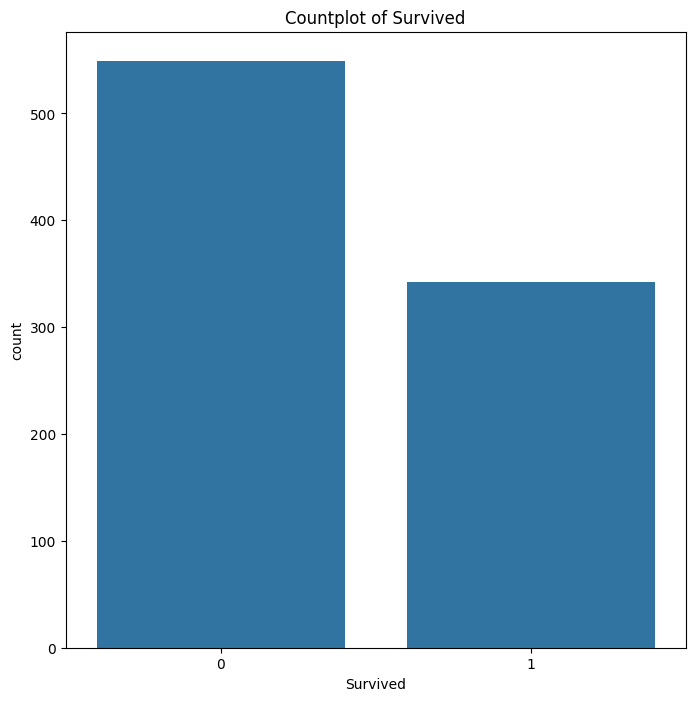

In [6]:
def coutplots(df,columns):
  plt.figure(figsize=(8,8))
  sns.countplot(data=df,x=columns)
  plt.xlabel(columns)
  plt.title(f'Countplot of {columns}')
  plt.show()
  return None
coutplots(df,'Sex',)
coutplots(df,'level')
coutplots(df,'Survived')

Countploty dla wartości kategorycznych, można zobaczyć ciekawy rozstaw w przypadku rozstawienia ludzi po pokładach, dane posiadane stanowią ok. 10%, a reszta jest nieznana, więc w tym przypadku nie możemy wykluczyć pasażerów na poziomie 6,7, dobrze to mogły być również poziomy dla konserwatorów statku.

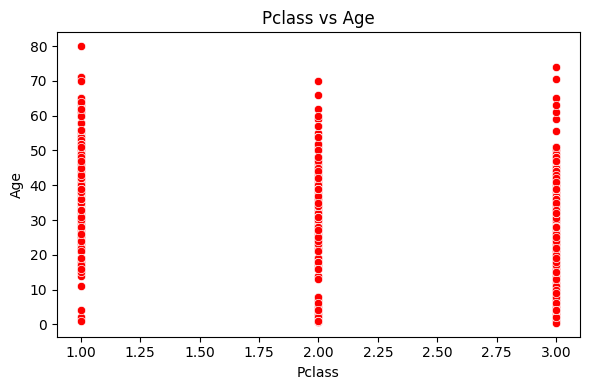

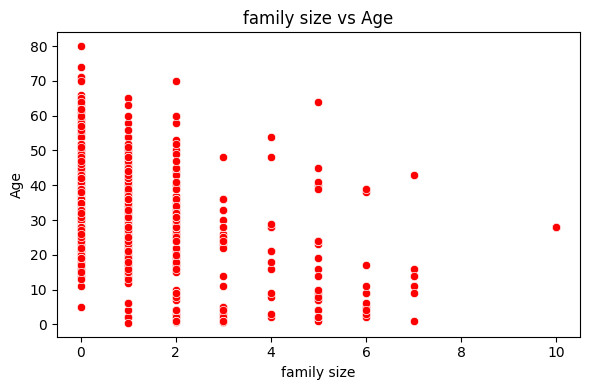

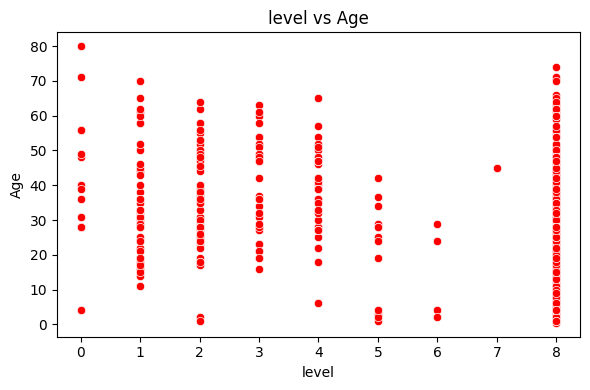

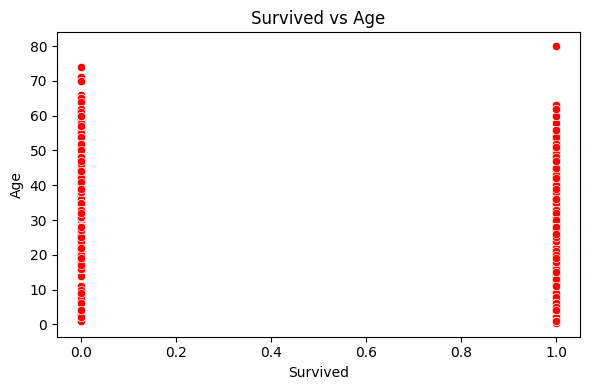

In [7]:
def Scatterplots_for_Age(df,y,columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df,x=columns,y=y, color="red")
    plt.title(f'{columns} vs {y}')
    plt.xlabel(columns)
    plt.ylabel('Age')
    plt.tight_layout()
    plt.show()
    return None
Scatterplots_for_Age(df,'Age','Pclass')
Scatterplots_for_Age(df,'Age','family size')
Scatterplots_for_Age(df,'Age','level')
Scatterplots_for_Age(df,'Age','Survived')

Scatterploty, dla wartości względem wieku

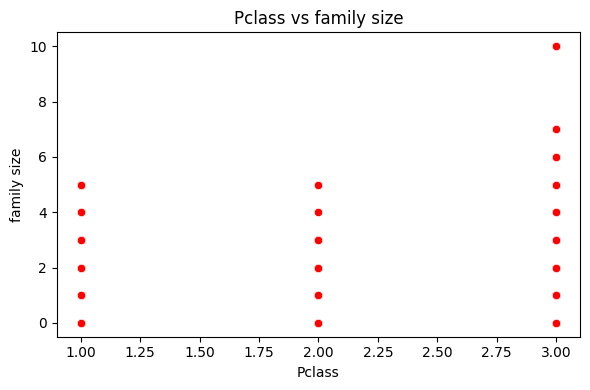

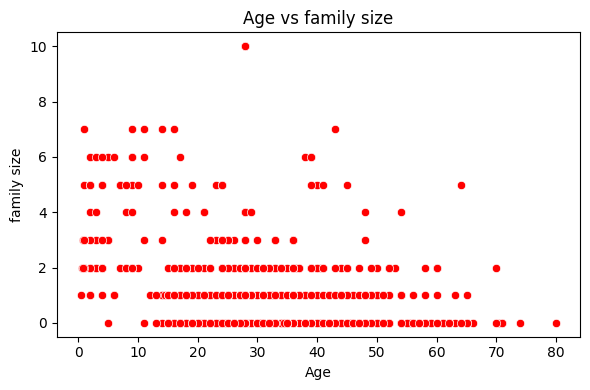

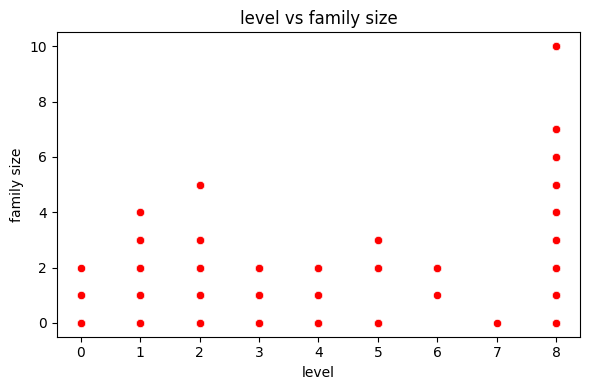

In [8]:
def scatterplots_for_familySize(df,y,columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df,x=columns,y=y, color="red")
    plt.title(f'{columns} vs {y}')
    plt.xlabel(columns)
    plt.ylabel('family size')
    plt.tight_layout()
    plt.show()
    return None
scatterplots_for_familySize(df,'family size','Pclass')
scatterplots_for_familySize(df,'family size','Age')
scatterplots_for_familySize(df,'family size','level')

Scatterploty, dla wartości względem wielkości rodziny, same moze nie wyglądaja tak ładnie jak wykresy słupkowe, lecz potrafią oddać niektóre szczegóły, np osoba w jakim wieku dokładnie posiadała 10 krewniaków na pokładzie.

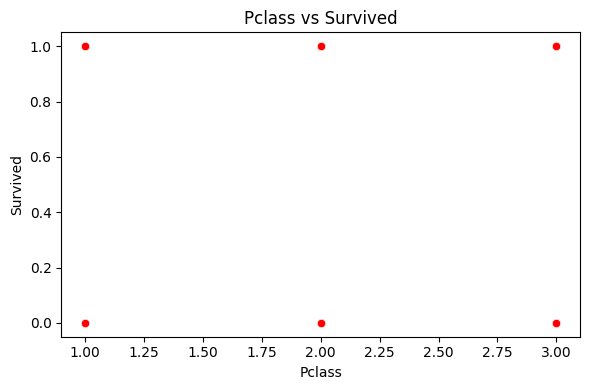

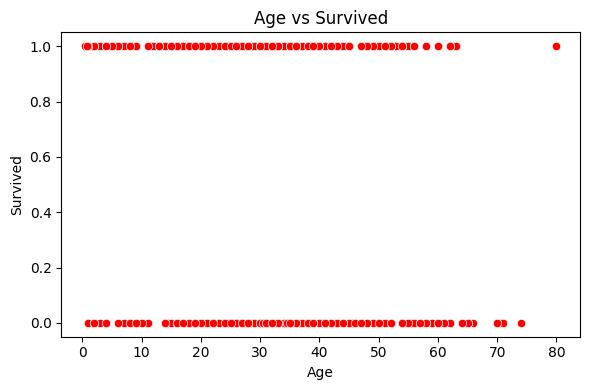

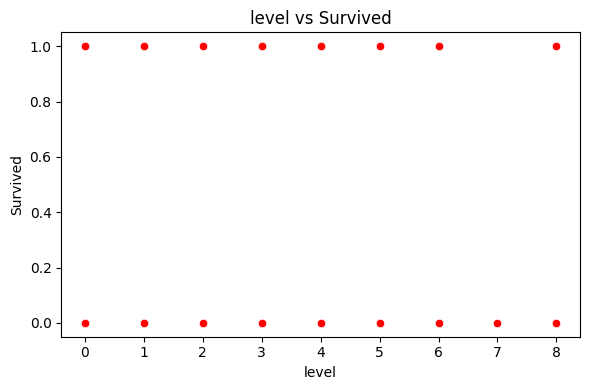

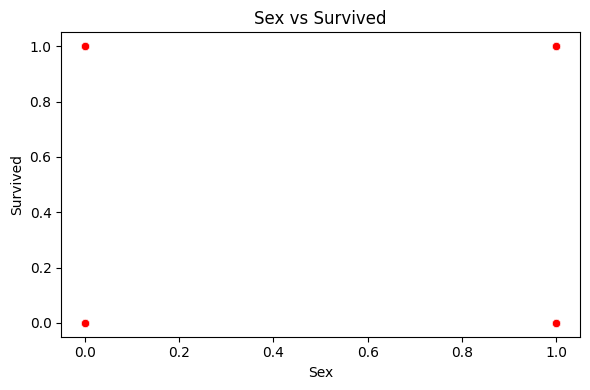

In [9]:
def Scatterplots_for_survived(df,y,columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df,x=columns,y='Survived', color="red")
    plt.title(f'{columns} vs Survived')
    plt.xlabel(columns)
    plt.ylabel('Survived')
    plt.tight_layout()
    plt.show()
    return None
Scatterplots_for_survived(df,'Survived','Pclass')
Scatterplots_for_survived(df,'Survived','Age')
Scatterplots_for_survived(df,'Survived','level')
Scatterplots_for_survived(df,'Survived','Sex')


Wykres wartości zmiennych względem przeżywalności

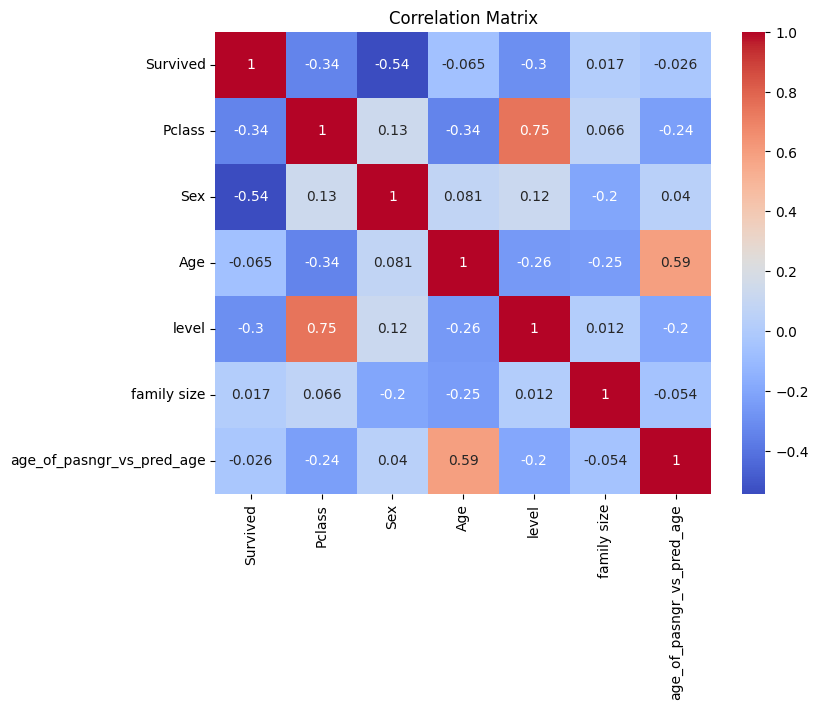

In [10]:
def correlation_matrix(df):
  corr=df.corr(numeric_only=True)
  plt.figure(figsize=(8,6))
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()
  return None
correlation_matrix(df)

Macierz pokazuje relacji zmiennych względem siebie, gdzie 1-to wartość relacji typu zmienna-zmienna i nie może być większa.